In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

from scipy.stats import rv_histogram

import nice
from nice.reload import deep_reload

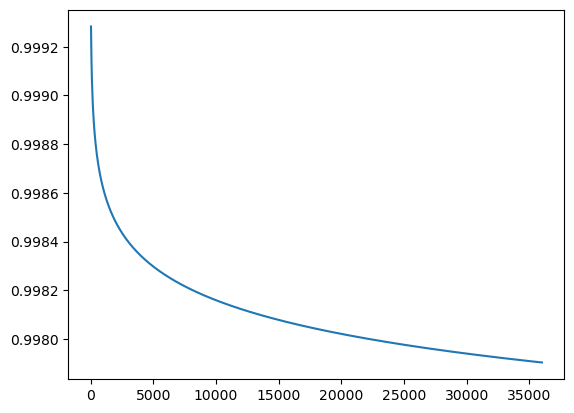

In [2]:
t = np.linspace(0, 36000, 1000)
c = 1
n = .0002

plt.plot(t, c / t ** n)

In [12]:
'''
Loading data
'''

df = pd.read_csv('Data/NHTS/ldtv2pub.csv')

In [3]:
df.LONGDIST.unique()

array([  1,   0,   2,   3,   6,  10,   4,  70,  30,   8,  12,   5,  15,
        17,  20,  60, 100,  50,   9,  25,  18,   7,  40,  11,  72,  91,
        22,  29,  45,  55,  35,  24,  66,  90,  14,  16,  63,  13,  71,
        80,  26,  75,  28, 207,  89,  93,  51,  19,  85,  27,  61,  64,
        21,  23,  56,  73])

In [4]:
df.keys()

Index(['HOUSEID', 'PERSONID', 'LONGDIST', 'MAINMODE', 'INT_FLAG',
       'LD_NUMONTRP', 'ONTP_P1', 'ONTP_P2', 'ONTP_P3', 'ONTP_P4', 'ONTP_P5',
       'ONTP_P6', 'ONTP_P7', 'ONTP_P8', 'ONTP_P9', 'ONTP_P10', 'FARREAS',
       'LD_AMT', 'LD_ICB', 'LDT_FLAG', 'BEGTRIP', 'ENDTRIP', 'NTSAWAY',
       'WEEKEND', 'MRT_DATE', 'FARCDIV', 'FARCREG', 'GCDTOT', 'AIRSIZE',
       'EXITCDIV', 'GCD_FLAG', 'NUMADLT', 'HOMEOWN', 'RAIL', 'CENSUS_D',
       'CENSUS_R', 'HH_HISP', 'DRVRCNT', 'CDIVMSAR', 'HHFAMINC',
       'HHFAMINC_IMP', 'HH_RACE', 'HHSIZE', 'HHVEHCNT', 'LIF_CYC', 'MSACAT',
       'MSASIZE', 'TRAVDAY', 'URBAN', 'URBANSIZE', 'URBRUR', 'TDAYDATE',
       'WRKCOUNT', 'STRATUMID', 'WTPERFIN', 'WTPERFIN5D', 'WTPERFIN2D',
       'R_AGE', 'R_SEX', 'WORKER', 'DRIVER', 'R_RACE', 'R_HISP', 'PROXY',
       'EDUC', 'R_SEX_IMP'],
      dtype='object')

In [10]:
df = df[(
    (df['PERSONID'] == 1) &
    (df['MAINMODE'] >= 1) &
    (df['MAINMODE'] <= 6) &
    (df['GCD_FLAG'] == 1)
)]

In [6]:
df = df[(
    (df['PERSONID'] == 1) &
    (df['MAINMODE'] >= 1) &
    (df['MAINMODE'] <= 6) 
)]

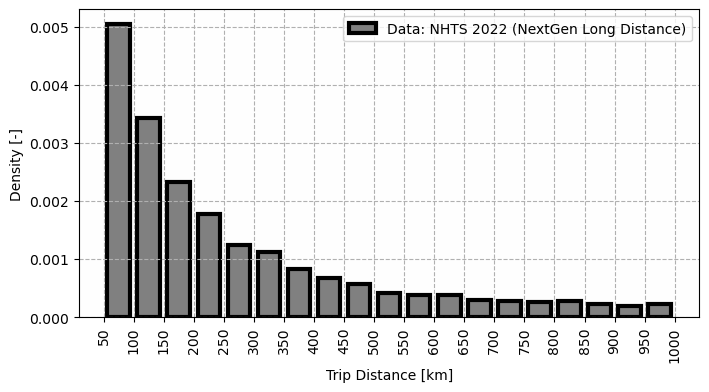

In [16]:
fig, ax = plt.subplots(figsize = (8, 4))

bins = np.arange(50, 1025, 50)
# bins = np.arange(0, 1100, 100)

values, bins = np.histogram(df['GCDTOT'] * 1.609, bins, density = True)

offset = (bins[1] - bins[0]) * .5

x = bins[:-1] + offset
y = values
s = y[0]

kw = {
    'color': 'gray',
    'lw': 3,
    'edgecolor': 'k',
    'label': 'Data: NHTS 2022 (NextGen Long Distance)',
    'width': (bins[1] - bins[0]) * .75,
}

ax.bar(x, y, **kw)

kw = {
    'facecolor': '#fefefe',
    'xlabel': 'Trip Distance [km]',
    'ylabel': 'Density [-]',
    'xticks': bins,
}

ax.set(**kw)

ax.tick_params(axis = 'x', rotation = 90)

kw = {
    'ls': 'dashed',
}

ax.grid(**kw)

_ = ax.legend()

fig.savefig(
    'Paper/figures/trip_distribution.png', bbox_inches = 'tight', dpi = 300
)

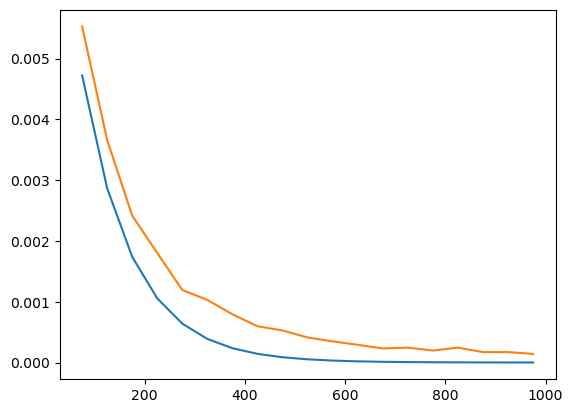

In [61]:
from scipy.optimize import curve_fit

t = np.linspace(0, 1000, 1000)
c = .01
n = .25

xx = x - x[0]

# curve_fit(lambda t, a, b: a * np.exp(b * t),  x,  y)

# p = np.polyfit(np.exp(xx), y, 1)

plt.plot(x, .01 * np.exp(-.01 * x))
plt.plot(x, y)

[ 0.00890009 -0.00686443]


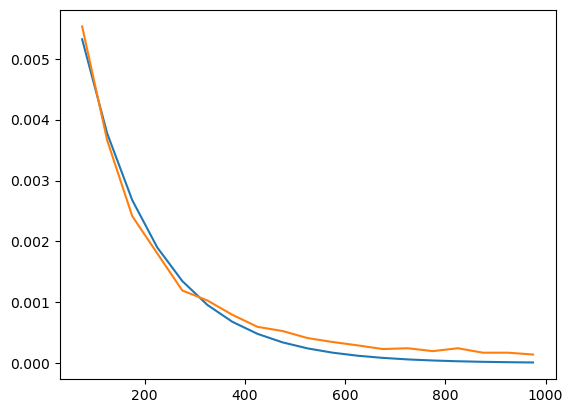

In [67]:
from scipy.optimize import curve_fit

p,  _ = curve_fit(lambda t, a, b: a * np.exp(b * t),  x,  y,  p0 = (.01, -.01))

print(p)

plt.plot(x, p[0] * np.exp(p[1] * x))
plt.plot(x, y)

In [62]:
from scipy.optimize import curve_fit

curve_fit(lambda t, a, b: a * np.exp(b * t),  x,  y,  p0 = (.01, -.01))

(array([ 0.00890009, -0.00686443]),
 array([[ 1.68406984e-07, -1.13811546e-07],
        [-1.13811546e-07,  1.01751949e-07]]))

In [45]:
x = np.array([1, 7, 20, 50, 79])
y = np.array([10, 19, 30, 35, 51])
curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(4, 0.1))

(array([1.72064284e+01, 1.39831145e-02]),
 array([[ 1.08135559e+01, -8.96846920e-03],
        [-8.96846920e-03,  9.24894646e-06]]))

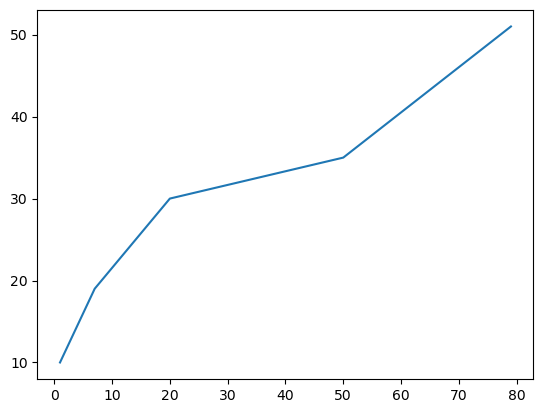

In [46]:
plt.plot(x, y)